In [64]:
#import required modules 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [60]:
#global variables
TICKER = 'AAPL'
START_DATE = '2018-01-01'
END_DATE = '2022-01-01'
WINDOW_LENGTH = 50
TEST_PERCENTAGE = 0.2
MODEL_OUTPUT_PATH = './model'
SCALER_OUTPUT_PATH = './Scalers'

### Extract Data and Create Dataset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.950493,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943367,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133541,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601875,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447342,82271200
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344925,62348900


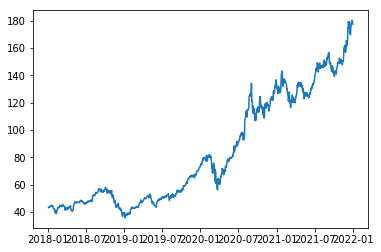

In [43]:
#download data from yahoo finance as pandas dataframe
stockData = yf.download(TICKER, start = START_DATE, end = END_DATE)
display(stockData)
plt.plot(stockData['Close'])

In [46]:
#get important data from the pandas dataframe
highs = stockData['High'] 
lows = stockData['Low'] 
closes = stockData['Close']

#merge the three arrays into a single array
#each element of the array will contain the high, low and close for each date
dataset = list(map(list, list(zip(highs, lows, closes))))

# scale data to ensure all values are in the range [0, 1]
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

# create new data scaler and fit it with the data from the closes array
#this data scaler will be used to tranform the normalised output data
#back into its original range
yScaler = MinMaxScaler()
closes = np.array(closes)
transformedCloses = np.reshape(closes, (len(closes), 1))
yScaler.fit(transformedCloses)


# ensure that number of elements in dataset is a mutliple of the window length
extraElements = len(dataset) % WINDOW_LENGTH
dataset = dataset[extraElements:]

#split dataset into sets of 50 (example of window length) for the x and the next price for the y
# for example, the first 50 days are added as an array to the X array and the close price of the 51st day is added to the Y array
X = []
Y = []


for i in range(0, len(dataset) - 50):
    X.append(dataset[i: i + 50])
    Y.append(dataset[i + 50][2])
    

# split data into train and test sets
testLength = round(len(X) * TEST_PERCENTAGE)
trainLength = len(X) - testLength

xTrain, yTrain, xTest, yTest = np.stack(X[:trainLength]), np.array(Y[:trainLength]), np.stack(X[trainLength:]), np.array(Y[trainLength:])

display(xTrain)
display(yTrain)

array([[[0.05428963, 0.05881632, 0.0602628 ],
        [0.05777282, 0.0596728 , 0.05870875],
        [0.0575326 , 0.05780257, 0.06373354],
        ...,
        [0.04625942, 0.04649375, 0.04603458],
        [0.04152367, 0.04009649, 0.03928306],
        [0.0469801 , 0.04271832, 0.05280335]],

       [[0.05777282, 0.0596728 , 0.05870875],
        [0.0575326 , 0.05780257, 0.06373354],
        [0.05899108, 0.06336083, 0.06400979],
        ...,
        [0.04152367, 0.04009649, 0.03928306],
        [0.0469801 , 0.04271832, 0.05280335],
        [0.05049758, 0.04355729, 0.04515393]],

       [[0.0575326 , 0.05780257, 0.06373354],
        [0.05899108, 0.06336083, 0.06400979],
        [0.05809883, 0.06189262, 0.06262843],
        ...,
        [0.0469801 , 0.04271832, 0.05280335],
        [0.05049758, 0.04355729, 0.04515393],
        [0.04169527, 0.04053346, 0.04194221]],

       ...,

       [[0.64371996, 0.63972594, 0.63262133],
        [0.63335624, 0.63930646, 0.63738712],
        [0.65929995, 0

array([0.04515393, 0.04194221, 0.04418696, 0.04228755, 0.04524027,
       0.05080033, 0.05285515, 0.04522301, 0.04810664, 0.05363217,
       0.05223352, 0.05516895, 0.05618772, 0.05806987, 0.06224855,
       0.06155784, 0.05285515, 0.04062991, 0.03980109, 0.03582961,
       0.03705557, 0.03803982, 0.03475904, 0.0398356 , 0.04646626,
       0.05936492, 0.05991746, 0.07190095, 0.0741975 , 0.07573429,
       0.0779963 , 0.08262392, 0.08012017, 0.0793604 , 0.07640771,
       0.0794122 , 0.07735742, 0.07618323, 0.07846252, 0.07765096,
       0.07972303, 0.0793604 , 0.08010291, 0.07892872, 0.07823804,
       0.07715019, 0.08296929, 0.08571478, 0.08827033, 0.08942723,
       0.08852935, 0.08549029, 0.08467873, 0.0864918 , 0.08376357,
       0.08393625, 0.08055185, 0.08037919, 0.07511267, 0.07651131,
       0.07471553, 0.07378308, 0.06903458, 0.07293697, 0.07247078,
       0.07478459, 0.07411116, 0.07768548, 0.07205635, 0.0746119 ,
       0.07904961, 0.08355637, 0.08315923, 0.07889421, 0.08433

### Build Tensorflow LSTM model
- 4 LSTM + Dropout layer pairs
- 1 dimensional Dense Layer for Output

In [6]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [13]:
xTrain.shape[1]

50

In [14]:
#define model architecture

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, 
                            return_sequences=True, 
                            input_shape=(xTrain.shape[1], xTrain.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units =50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1)) #output layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            10800     
                                                                 
 dropout_8 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [47]:
#compile and train model with xTrain and yTrain arrays
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xTrain, yTrain, epochs = 100, batch_size = 32)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/24 [==============================] - 7s 60ms/step - loss: 0.0038
Epoch 2/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0027
Epoch 3/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0021
Epoch 4/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0019
Epoch 5/100
24/24 [==============================] - 1

In [50]:
def makePredictions(xTest):
    output = []
    
    for test in xTest:
        #convert input into 3d array with length of 1
        test = test.reshape(1, *test.shape)
        prediction = model.predict(test)
        
        reScaledPrediction = yScaler.inverse_transform(prediction)
        output.append(reScaledPrediction[0][0])
    
    return output

predictions = makePredictions(xTest)

1/1 [==============================] - 0s 28ms/step


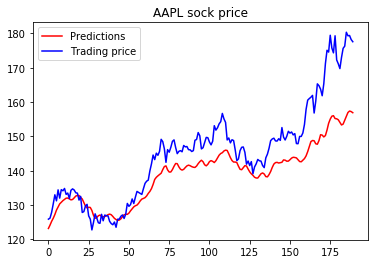

In [56]:
#plot graph of predictions against real values
output = yScaler.inverse_transform(yTest.reshape(-1, 1))

plt.plot(predictions, c = 'r', label = 'Predictions')
plt.plot(output, c = 'b', label = f'Trading price')
plt.legend(loc = 'upper left')
plt.title(f'{TICKER} sock price')
plt.show()

In [65]:
# Save tensorflow model
# model.save(MODEL_OUTPUT_PATH)

# Save data scalers
with open(f'{SCALER_OUTPUT_PATH}/x_scaler', 'wb') as outputFile:
    dump(scaler, outputFile)

with open(f'{SCALER_OUTPUT_PATH}/y_scaler', 'wb') as outputFile:
    dump(yScaler, outputFile)